# Physics 240 
## Intermediate Physics Laboratory
## FINAL EXAM

### Instructions: 
Answer the following questions and typeset your answers within this notebook, 
using a mix of markdown and LaTeX code. Some of your work will likely be done
by hand; for this work, make sure to turn in these calculations, but still put the 
answers in this Jupyter Notebook. 

Follow the steps below and answer the questions as indicated.

In [1]:
## This cell installs custom CSS Cell Styles obtained from 
## Prof. Lorena Barba at https://github.com/barbagroup/AeroPython 
from IPython.core.display import HTML
def css_styling():
    styles = open('styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()

## Step 1: Create a GitHub Repository and make an initial commit.
    a. Create a folder in your Documents folder called LastnameFirstname240FinalExam.
    b. Create a new repository within this folder called 240FinalExam
    c. Save this file into the above folder as LastnameFirstnameAnswers.ipynb 
    d. You should then see an uncommitted change to the 240FinalExam repository; name this "initial commit"
    and publish the changes.
    
For example, if your name was Albert Einstein, you'd create a folder called   
    *EinsteinAlbert240FinalExam*,   
then you would create a new GitHub repository (within this folder) called   
    *240FinalExam*   
and would save this file into the folder 240FinalExam as    
    *EinsteinAlbertFinalAnswers.ipynb*   
and upload the file to your github account. 

Hint: Once you complete steps (a) and (b), you can simply close and halt this notebook (from the Jupyter Notebook file menu, and use your file system browser to drag this file into the folder 240FinalExam. Then this file's existence should show up as as an uncommitted change which you can publish (after first labelling it as the initial commit, of course). 

All of the above may be easily done by using a GitHub Gui Client available for OSX, Linux, and Windoze at:
https://github.com/gitterHQ/desktop

For the following questions, I encourage you to make and publish a new commit after you finish each question.


# Question 1
## Statistical Uncertainty with dropped velociraptors

<img src="Velociraptor.jpg" width=150 height=150>

A velociraptor is dropped from a height of 10.0 $\pm$ 0.1 meters and the fall time   
is measured to the nearest 0.01 seconds. This *experiment* is performed a dozen times with the following drop times in seconds obtained:   
1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35   
Calculate the mean value of the drop time and the root mean square uncertainty, $\Delta t_{rms}$. You may use python or---if you like suffering---your calculator. 

### Solution method :

The rms is given by the sum of the squares of the deveations from the mean all square rooted.
$$rms = \sqrt{\Delta t_1^2 + \Delta t_2^2 + \Delta t_3^2 + ...}$$
we could use the uncertinties package for this, but let's do it out both long and short to compare our results. 

In [20]:
# Place any python code needed here.
# First let's try it with the uncertinties package:
from uncertainties import unumpy
import uncertainties as u

# make an array of times:
times = [1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35]
timesU = unumpy.uarray(times, 0.01) # add the uncertinty to the time array
averageTimeU = sum(timesU)/len(timesU)
print('average fall time = %s (seconds)' % averageTimeU)
print("if we print the sum we can see that the uncertinties package calculates \none standard deveation not the rms.\nsum = %s" % sum(timesU))

average fall time = 1.4142+/-0.0029 (seconds)
if we print the sum we can see that the uncertinties package calculates 
one standard deveation not the rms.
sum = 16.970+/-0.035


In [42]:
# now let's do it the long way:
times = [1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35]
averageTime = sum(times)/len(times) # calculate the mean

# calculate the deveation from the mean
dt = [] 
for i in times:
    dt.append(i - averageTime) 
print('deveation from the mean in seconds:\n%s' % dt)
# in the worst case, the error in our time measurement will
# compound with the error in our data so let's add it in!
for i in range(len(dt)):
    if dt[i] > 0: # if the deveation is positive
        dt[i] += 0.01 # add the timing uncertinty
    if dt[i] < 0: # if its negative
        dt[i] -= 0.01 # subtract the timing uncertinty

print('deveation from the mean in seconds with timing error:\n%s' % dt)
# take the rms of the deveation from the mean
squaredSum = 0
for i in dt:
    squaredSum += i**2
#squaredRMS = squaredSum #/len(dt)
RMS = squaredSum**(1/2)
print('RMS = %s ' % RMS)


deveation from the mean in seconds:
[-0.19416666666666682, -0.02416666666666689, 0.13583333333333325, 0.015833333333333144, -0.3041666666666667, 0.2258333333333331, 0.025833333333333153, -0.08416666666666672, 0.13583333333333325, 0.0758333333333332, 0.05583333333333318, -0.0641666666666667]
deveation from the mean in seconds with timing error:
[-0.20416666666666683, -0.034166666666666894, 0.14583333333333326, 0.025833333333333146, -0.3141666666666667, 0.23583333333333312, 0.035833333333333155, -0.09416666666666672, 0.14583333333333326, 0.08583333333333319, 0.06583333333333317, -0.0741666666666667]
RMS = 0.5174214916294064 


### Question 1 Answer

Mean time = $1.41(s)$   

$\Delta t_{rms}$ = $0.5(s)$

# Question 2
## Error Propagation; measuring g via dropped velociraptors

Suppose you assume that the velociraptor drop experiment was used to determine the acceleration due to gravity. Using your knowledge of basic kinematics (and assuming
no air resistance), calculate the experimental value of $g$ that you should report for this data.

### Solution Method:

Edit this text to explain your reasoning. Your explaination should include some
properly typeset LaTeX code detailing the equation you are using to compute $g$ as well as how you are calculating the uncertainty in $g$

If we assume constant acceleration of the velocoraptor and innital velocity of zero, we can model it's position as a function of time with: 
$$X_f = X_0 - \frac{1}{2}gt^2$$

solving this equation for g we obtain:
$$g = \frac{2(\Delta X)}{t^2}$$

to get $\pm g$ we need to use the rms equation: 
$$\pm g = \sqrt{(\frac{\delta g}{\delta t}\Delta t)^2 + (\frac{\delta g}{\delta X}\Delta X )^2} $$

subbing in our equation for g we get:
$$\pm g = \sqrt{(\frac{-4\Delta X}{t^3}0.01)^2 + (\frac{2}{t^2}0.1)^2} $$


Now we can run through our data and calculate g and give an error for each measurement.


In [77]:
# This cell is for any needed python code. 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)
times = [1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35]
timeError = 0.01
deltaX = 10
deltaXError = 0.1

# make an array of g values
g = []
# and one of g errors
gError = []
for i in times:
    g.append(2*deltaX/(i**2))
    gError.append((((-4*deltaX)/(i**3))**2*timeError**2+((2)/(i**2))**2*deltaXError**2)**(1/2))

#plt.plot(g)
#plt.show()


print(g)
print(gError)

[13.437248051599033, 10.351431085347551, 8.324661810613943, 9.780429360848943, 16.232448664881094, 7.436049970255802, 9.645061728395062, 11.306461642828875, 8.324661810613943, 9.008603216071348, 9.255402841408673, 10.973936899862824]
[0.25803188881579564, 0.18138017920861263, 0.13589694529359866, 0.1681575780544179, 0.3345022761357636, 0.11727313271954277, 0.1650690350731885, 0.20418393921231529, 0.13589694529359866, 0.1507890738799722, 0.15627880123915555, 0.19614779880324995]


The variation in our data exceeds our predicted theoretical error so we cannot say that we have accounted for all possible experemental errors. to honestly report g we need to use the experemental data alone or find a better model for our data that acounts for other uncertinties. I'm going to take the uncertinty in g as the deveation from the mean and calculate the mean from the values of g that we obtained. 

In [78]:
average_g = sum(g)/len(g)
gRmsError = []
for i in range(len(gError)):
    gRmsError.append(gError[i]**2)
gRms = (sum(gRmsError))**.5 # take the square root
print('g = %s (m/s)' % u.ufloat(average_g, gRms))

g = 10.3+/-0.7 (m/s)


### Question 2 Answer

g = $10.3\pm0.7 (\frac{m}{s})$ 

# Question 3
## Determining g with a point mass pendulum via plotting

Suppose that you measure the period of a simple pendulum as a function of length   
and obtain the following data:   

Period Values ($\pm 0.1$ s) =  0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50.   
Length $(\pm 0.03)$ m =  0.010,  0.025, 0.070,  0.10,  0.140, 0.230, 0.310, 0.350, 0.500   

Knowing that the period of a simple pendulum is   
$\displaystyle T = 2π\sqrt{\frac{L}{g}}$   
and use an appropriate graph, such that the plot:   

    a. gives a straight line whose slope   
       directly gives the value of g   
    b. shows data points with error bars   
    c. includes axes labels and units   
    d. includes a best fit line to the data.   

Note that you might not be on the earth when conducting this experiment.


### Solution method:

We can solve $\displaystyle T = 2π\sqrt{\frac{L}{g}}$ for g which gives:
$$g = \frac{4\pi^2 L}{\displaystyle T^2}$$
if we plot the top of the fraction as a function of the bottom we can obtain a slope of g on our errorbar plot.

LinregressResult(slope=0.93297068900225744, intercept=0.22454340170555565, rvalue=0.9953316545002634, pvalue=2.2784250226102943e-08, stderr=0.034193236095423282)


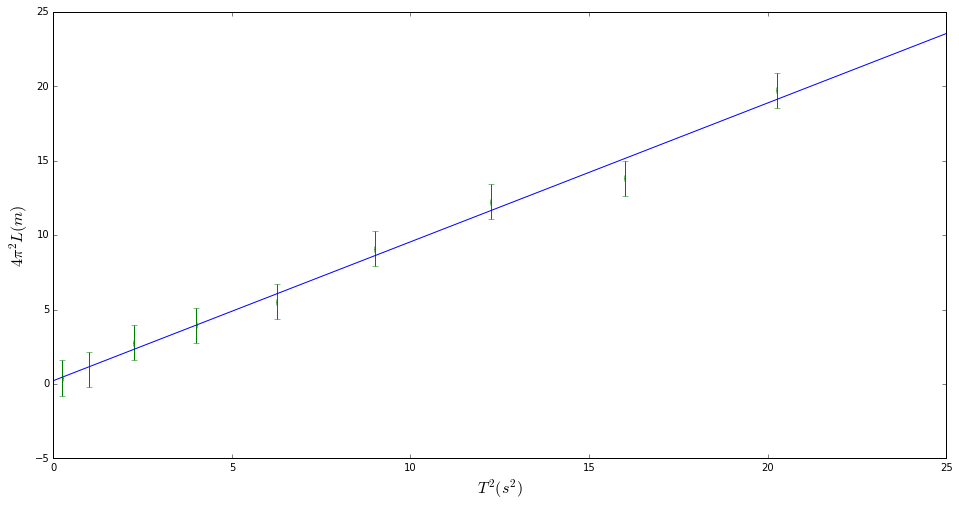

In [81]:
# place your python code here. Make sure your plot has axes labels with units!
import numpy as np
from scipy.stats import linregress
Period = np.array(([0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50])) # Period Values (±0.1 s)
l = np.array(([0.010, 0.025, 0.070, 0.10, 0.140, 0.230, 0.310, 0.350, 0.500])) # Length (±0.03) m

# convert to ufloat arrays
#Period = unumpy.uarray(Period, 0.1)
#l = u.unumpy.uarray(l, 0.03)
#print((l))

rise = 4 * 3.1415926**2 * l
riseError = 4 * 3.1415926**2 * 0.03
run = Period**2
runError = 0.1**2

print(linregress(run, rise))
#print(rise)
plt.xlabel('$T^2(s^2)$', fontsize=16)
plt.ylabel('$4\pi^2L(m)$', fontsize=16)
plt.plot([0,25],[0.22454340170555565, 0.93297068900225744*25 + 0.22454340170555565])
plt.errorbar(run, rise, xerr=runError, yerr=riseError, fmt='None')
plt.show()



get the $\pm$ slope by visual inspection:

In [83]:
print(run)
print(22/20)

[  0.25   1.     2.25   4.     6.25   9.    12.25  16.    20.25]
1.1


### Question 3 Answer

g $\pm\;\Delta$ g = $0.93\pm0.2(m/s)$

# Final Step for online portion
## Final steps, then move on to written portion

Now make sure to commit your changes to your master copy, but before doing so, place a link to your repository in the next cell.   

Repository Link = https://github.com/WilliamMorse/I-Lab2FinalWilliamMorse